In [1]:
import pandas as pd
import numpy as np

In [2]:
from os import listdir
from os.path import isfile, join

path = "../data connectors/wikipedia/"
files = [f for f in listdir(path) if isfile(join(path, f))]

In [3]:
files

['.DS_Store',
 'articles_metrics.json',
 'data.csv',
 'README.md',
 'WikiAPIConnector.py']

In [4]:
file_path = path+'data.csv'
d = pd.read_csv(file_path)

In [5]:
d['timestamp'] = d['timestamp'].astype('str')
d['timestamp'] = [pd.Timestamp(year=int(t[:4]),month=int(t[4:6]),day=int(t[6:8])) for t in d['timestamp'].to_list()]

In [53]:
views_col = 'pageview'

feature_names = [views_col,'sma10','sma21']

for article in d['article'].unique()[:1]:
    data = pd.DataFrame()
    
    d_ = d[d['article'] == article].copy()
    d_['day'] = [pd.Timestamp(t) for t in d_['timestamp']]
    d_.rename(columns={'views':'pageview'},inplace=True)

    x = d_[['article','day',views_col]].copy()

    #generate sma of view
    for f in feature_names[1:]:
        x[f] = x.rolling(window=int(f[-2:]))['pageview'].mean()

    for feature in feature_names:
        x['log_'+feature] = np.log(x[feature])
        x['diff_'+feature] = x[feature].diff()
        x['log_diff_'+feature] = x['log_'+feature].diff()
        x['diff_ratio_'+feature] = (x['diff_'+feature]/x[feature])*100

    data = pd.concat([data,x],ignore_index=True)
    #data.to_csv("generated_wiki_pageview_data/"+article+"_daily.csv",index=False)

In [54]:
data

,article,day,pageview,sma10,sma21,log_pageview,diff_pageview,log_diff_pageview,diff_ratio_pageview,log_sma10,diff_sma10,log_diff_sma10,diff_ratio_sma10,log_sma21,diff_sma21,log_diff_sma21,diff_ratio_sma21
0,Bitcoin,2015-07-01,13137,NaN,NaN,9.483188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bitcoin,2015-07-02,9938,NaN,NaN,9.204121,-3199.0,-0.279067,-32.189575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bitcoin,2015-07-03,8498,NaN,NaN,9.047586,-1440.0,-0.156535,-16.945164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bitcoin,2015-07-04,9113,NaN,NaN,9.117457,615.0,0.069871,6.748601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bitcoin,2015-07-05,8908,NaN,NaN,9.094705,-205.0,-0.022752,-2.301302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,Bitcoin,2020-08-30,6355,10353.2,11695.000000,8.756997,-357.0,-0.054655,-5.617624,9.245051,-334.0,-0.031751,-3.226056,9.366917,-251.238095,-0.021255,-2.148252
1888,Bitcoin,2020-08-31,14344,10236.2,11686.714286,9.571087,7989.0,0.814090,55.695761,9.233686,-117.0,-0.011365,-1.143002,9.366208,-8.285714,-0.000709,-0.070899
1889,Bitcoin,2020-09-01,7559,10215.8,11140.952381,8.930494,-6785.0,-0.640593,-89.760550,9.231691,-20.4,-0.001995,-0.199691,9.318383,-545.761905,-0.047825,-4.898701
1890,Bitcoin,2020-09-02,8578,9597.1,11174.380952,9.056956,1019.0,0.126462,11.879226,9.169216,-618.7,-0.062475,-6.446739,9.321379,33.428571,0.002996,0.299154


In [55]:
for c in data.columns:
    print(c,data[c].shape,data[c].dropna().shape)


article (1892,) (1892,)
day (1892,) (1892,)
pageview (1892,) (1892,)
sma10 (1892,) (1883,)
sma21 (1892,) (1872,)
log_pageview (1892,) (1892,)
diff_pageview (1892,) (1891,)
log_diff_pageview (1892,) (1891,)
diff_ratio_pageview (1892,) (1891,)
log_sma10 (1892,) (1883,)
diff_sma10 (1892,) (1882,)
log_diff_sma10 (1892,) (1882,)
diff_ratio_sma10 (1892,) (1882,)
log_sma21 (1892,) (1872,)
diff_sma21 (1892,) (1871,)
log_diff_sma21 (1892,) (1871,)
diff_ratio_sma21 (1892,) (1871,)


In [46]:
data['sma10'].dropna().shape

(5649,)

In [47]:
data['log_sma10'].dropna().shape

(3766,)

In [48]:
def apply_func(x):
    if np.isnan(np.log(x)):
        return 0
    else:
        return 1
data['logsma10_nan'] = data['sma10'].apply(apply_func)

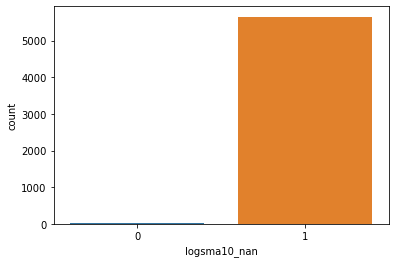

In [49]:
sns.countplot(data['logsma10_nan'])

In [50]:
data[data['logsma10_nan'] == 0].shape

(27, 18)

In [52]:
np.log(data['sma10']).dropna().shape

(5649,)

In [56]:
np.log(1)

0.0

In [57]:
np.log(0)

<ipython-input-57-f6e7c0610b57>:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [58]:
np.log(-10)

<ipython-input-58-0d1208038d97>:1: RuntimeWarning: invalid value encountered in log
  np.log(-10)


nan